In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'D:\\Coding\\archive'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '3-percent-change.csv',
 'file_name.csv',
 'fundamentals.csv',
 'prices-split-adjusted.csv',
 'prices-split-adjusted1.csv',
 'prices.csv',
 'Question3.csv',
 'securities.csv',
 'Test.ipynb']

## Question 2

In [4]:
df_s= pd.read_csv('securities.csv')

In [5]:
df_s.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [6]:
 df_s.rename(columns = {'Date first added':'Date_first_added','Ticker symbol':'Ticker_symbol','GICS Sector':'GICS_Sector'}, inplace = True)

In [7]:
df_s.head()

,Ticker_symbol,Security,SEC filings,GICS_Sector,GICS Sub Industry,Address of Headquarters,Date_first_added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [8]:
df_p= pd.read_csv('prices-split-adjusted.csv')

In [9]:
df_p.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [10]:
# df_s.Security.unique()

In [11]:
# !pip install -U pandasql

In [12]:
# !pip install -U pandasql
from pandasql import sqldf 
mysql = lambda q: sqldf(q, globals())
mysql("SELECT Security FROM df_s;") #show list of securities(stocks)


query ='''SELECT s.Ticker_symbol,s.Security,s.GICS_Sector,p.date as Latest_Date,p.close as Close_price_Latest_Date,p.change as Change 
          FROM df_s AS s 
          INNER JOIN df_p AS p 
          ON s.Date_first_added = p.date
          WHERE p.change>3;'''
result=mysql(query)

In [13]:
mysql = lambda q: sqldf(q, globals())

In [14]:
mysql("SELECT Security FROM df_s;") #show list of securities(stocks)

,Security
0,3M Company
1,Abbott Laboratories
2,AbbVie
3,Accenture plc
4,Activision Blizzard
...,...
500,Yahoo Inc.
501,Yum! Brands Inc
502,Zimmer Biomet Holdings
503,Zions Bancorp


In [15]:
df_p['change'] = df_p[['open','close']].pct_change(axis=1)['close']
df_p['change']=df_p['change']*100
df_p

,date,symbol,open,close,low,high,volume,change
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,1.952520
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-4.199932
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-1.228733
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,0.987184
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-1.743442
...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,-0.106477
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,-0.069652
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,-0.205071
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,1.609660


In [16]:
df_p[df_p['change']>3]

,date,symbol,open,close,low,high,volume,change
121,2016-06-28,WLTW,113.809998,117.559998,113.639999,117.629997,795200.0,3.294965
216,2016-11-10,WLTW,118.669998,122.269997,117.699997,122.980003,1524500.0,3.033622
274,2010-01-04,ALB,36.910000,38.090000,36.900002,38.240002,712900.0,3.196966
295,2010-01-04,AVGO,18.299999,18.860001,18.010000,18.900000,538700.0,3.060120
335,2010-01-04,CI,35.270000,36.369999,35.180000,36.410000,3227300.0,3.118795
...,...,...,...,...,...,...,...,...
849572,2016-12-27,MOS,29.150000,30.040001,29.110001,30.309999,2729200.0,3.053177
849600,2016-12-27,NVDA,112.059998,117.320000,111.220001,117.360001,29669800.0,4.693916
850587,2016-12-29,NEM,33.270000,35.270000,33.150002,35.310001,12056600.0,6.011422
850600,2016-12-29,NVDA,104.900002,111.430000,102.800003,111.489998,54036800.0,6.224974


In [17]:
query ='''SELECT s.Ticker_symbol,s.Security,s.GICS_Sector,p.date as Latest_Date,p.close as Close_price_Latest_Date,p.change as Change 
          FROM df_s AS s 
          INNER JOIN df_p AS p 
          ON s.Date_first_added = p.date
          WHERE p.change>3;'''
result=mysql(query)

In [18]:
result

,Ticker_symbol,Security,GICS_Sector,Latest_Date,Close_price_Latest_Date,Change
0,NRG,NRG Energy,Utilities,2010-01-29,16.170000,3.786906
1,URBN,Urban Outfitters,Consumer Discretionary,2010-02-08,99.919998,4.573516
2,URBN,Urban Outfitters,Consumer Discretionary,2010-02-08,34.709999,3.150065
3,URBN,Urban Outfitters,Consumer Discretionary,2010-02-08,15.390000,4.338983
4,BRK.B,Berkshire Hathaway,Financials,2010-02-16,15.160000,3.410641
...,...,...,...,...,...,...
1374,MAA,Mid-America Apartments,Real Estate,2016-12-02,33.720001,3.435592
1375,EVHC,Envision Healthcare Corp,Health Care,2016-12-02,33.580002,3.164372
1376,MAA,Mid-America Apartments,Real Estate,2016-12-02,33.580002,3.164372
1377,EVHC,Envision Healthcare Corp,Health Care,2016-12-02,120.809998,3.477514


In [19]:
result.to_csv('3-percent-change.csv')

## Question 3

In [20]:
df_rand= pd.read_csv('prices-split-adjusted.csv')

In [21]:
df_rand

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [22]:
al=df_rand.symbol.unique()

In [23]:
import random
r=random.choices(al, k=5)

In [24]:
c=[]
for i in r:
    k=df_rand.groupby('symbol').get_group(i)
    j=k.head()
    m=j.head(1)
    c.append((i,m.iloc[0,0],m.iloc[0,3],j.close.mean()))
z=list(zip(*c))
df = pd.DataFrame()
df['Symbol']=z[0]
df['Date']=z[1]
df['Close price']=z[2]
df['5 Day Rolling Mean']=z[3]

In [25]:
df

,Symbol,Date,Close price,5 Day Rolling Mean
0,FSLR,2010-01-04,135.460007,138.607999
1,RHI,2010-01-04,27.120001,28.348000
2,AFL,2010-01-04,47.570000,49.044000
3,WM,2010-01-04,34.160000,34.098000
4,INTC,2010-01-04,20.879999,20.796000


In [26]:
df.to_csv('Question3.csv')

## Question 4

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
dff=pd.read_csv('Question3.csv')

In [29]:
del dff['Unnamed: 0']

In [30]:
dff

,Symbol,Date,Close price,5 Day Rolling Mean
0,FSLR,2010-01-04,135.460007,138.607999
1,RHI,2010-01-04,27.120001,28.348000
2,AFL,2010-01-04,47.570000,49.044000
3,WM,2010-01-04,34.160000,34.098000
4,INTC,2010-01-04,20.879999,20.796000


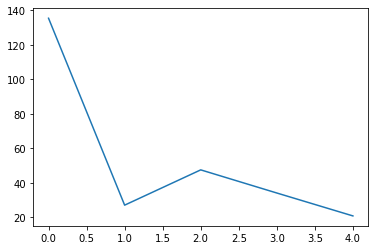

In [31]:
plt.plot(df['Close price'])

## Question4

In [32]:
df1=pd.read_csv('fundamentals.csv')

In [33]:
df1

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08
